<a href="https://colab.research.google.com/github/akay-10/Emotions_Classification_Using_EEG_Signals/blob/master/EEGEmotionsRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import *
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This is a dataset of EEG brainwave data that has been processed with our original strategy of statistical extraction .
#The data was collected from two people (1 male, 1 female) for 3 minutes per state - positive, neutral, negative. We used a Muse EEG headband which recorded the TP9, AF7, AF8 and TP10 EEG placements via dry electrodes. 
emotion_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emotions.csv')



In [4]:
from collections import defaultdict

neu = 0
pos = 0
neg = 0
results = emotion_data.iloc[:,-1:]
# print(type(results))
# print(results)
for i in range(len(emotion_data)):
  if(results.iloc[i, 0]=='NEGATIVE'):
    neg = neg + 1
  elif (results.iloc[i, 0]=='POSITIVE'):
    pos = pos + 1
  else:
    neu = neu + 1  

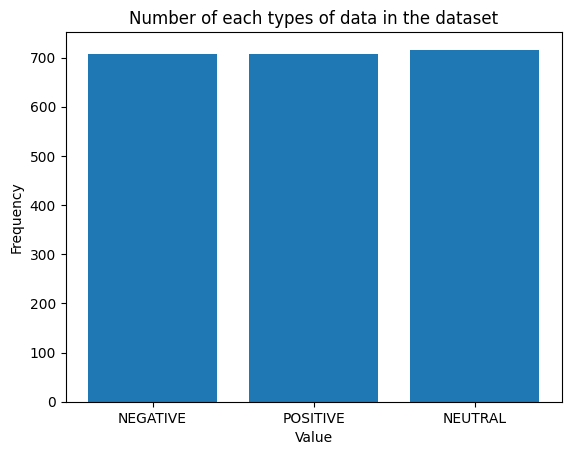

708 708 716


In [5]:
freq = []
freq.append(neg)
freq.append(pos)
freq.append(neu)


# Example data
values = ['NEGATIVE', 'POSITIVE', 'NEUTRAL']

# Create histogram
plt.bar(values, freq)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number of each types of data in the dataset')

# Display the histogram
plt.show()

print(neg, pos, neu)     

In [6]:
emotion_data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [7]:
features = emotion_data.columns[:-1]
track = set()
cache = {c.split("_")[0]: 0 for c in features}

# till label column search every feature
for col in list(features):
    feature = col.split("_")[0]
    cache[feature] += 1
    track.add(feature)

In [8]:
cache

{'# mean': 1,
 'mean': 119,
 'stddev': 20,
 'moments': 40,
 'max': 120,
 'min': 120,
 'covmat': 288,
 'eigen': 24,
 'logm': 156,
 'entropy0': 2,
 'entropy1': 2,
 'entropy2': 2,
 'entropy3': 2,
 'entropy4': 2,
 'correlate': 150,
 'fft': 1500}

In [9]:
track

{'# mean',
 'correlate',
 'covmat',
 'eigen',
 'entropy0',
 'entropy1',
 'entropy2',
 'entropy3',
 'entropy4',
 'fft',
 'logm',
 'max',
 'mean',
 'min',
 'moments',
 'stddev'}

In [10]:
emotion_data.shape
# Genrally each row represents samples and each column represents samples per second.

(2132, 2549)

In [11]:
classes=["NEUTRAL","NEGATIVE","POSITIVE"]

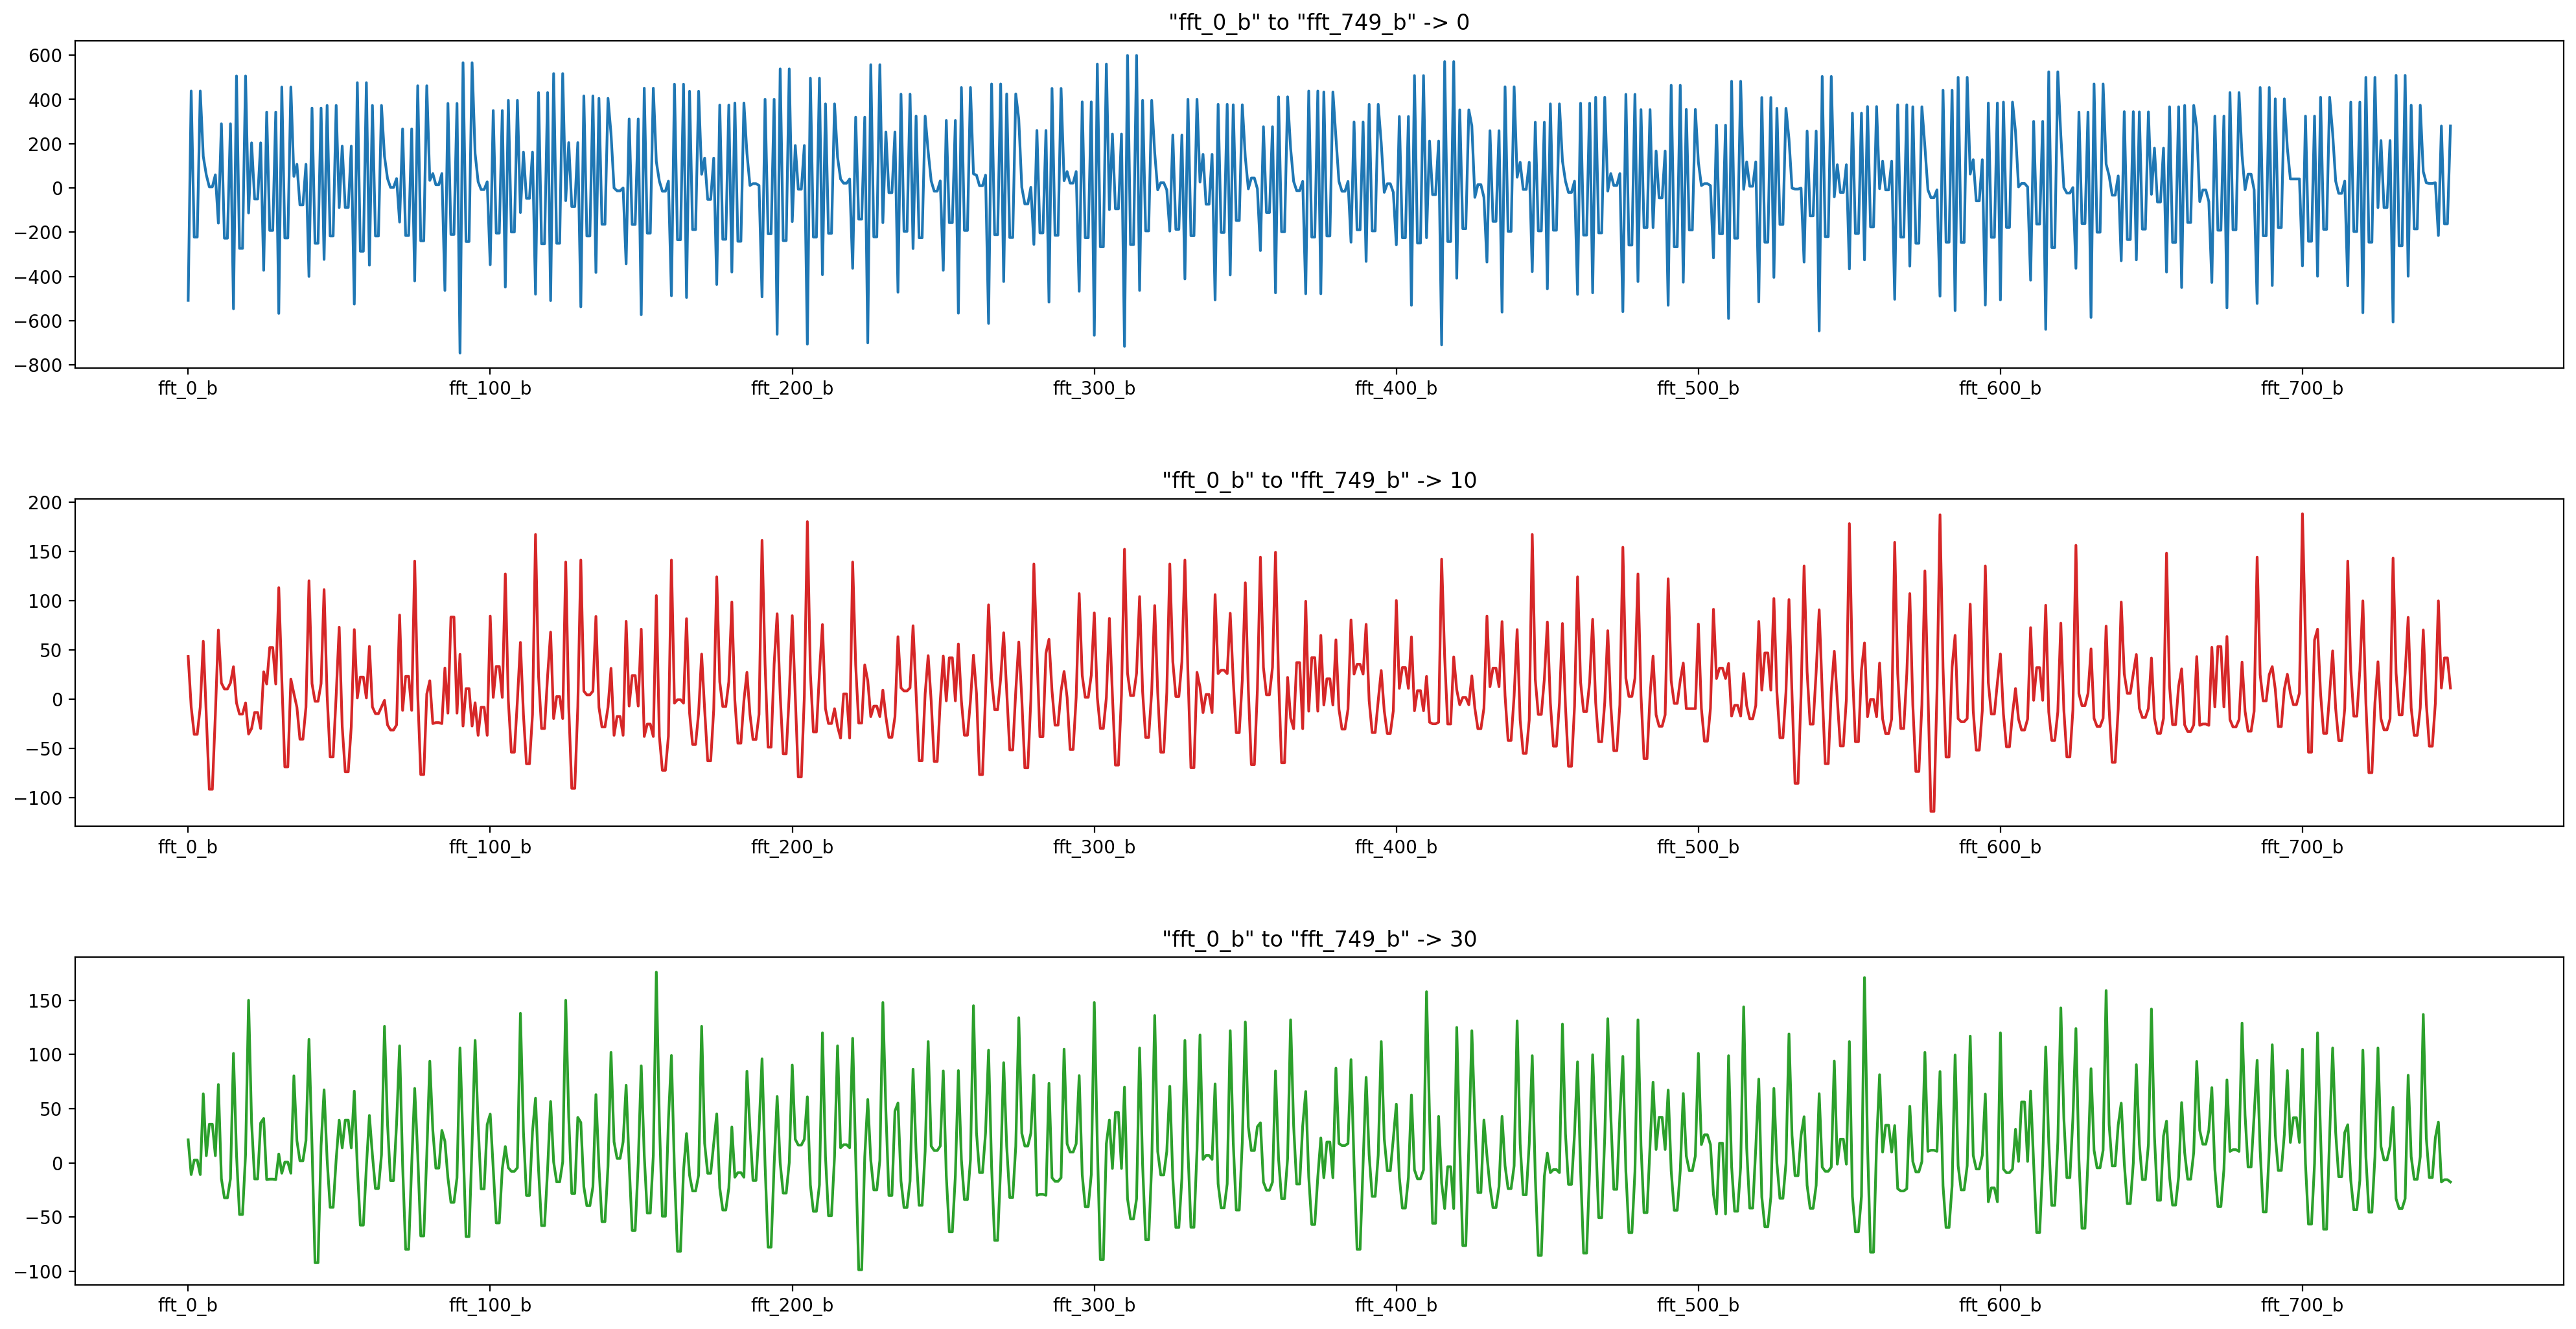

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

# patients from likely first part
emotion_data.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" to \"fft_749_b\" -> 0', color='tab:blue', ax=axes[0])
emotion_data.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" to \"fft_749_b\" -> 10', color='tab:red', ax=axes[1])
emotion_data.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" to \"fft_749_b\" -> 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)

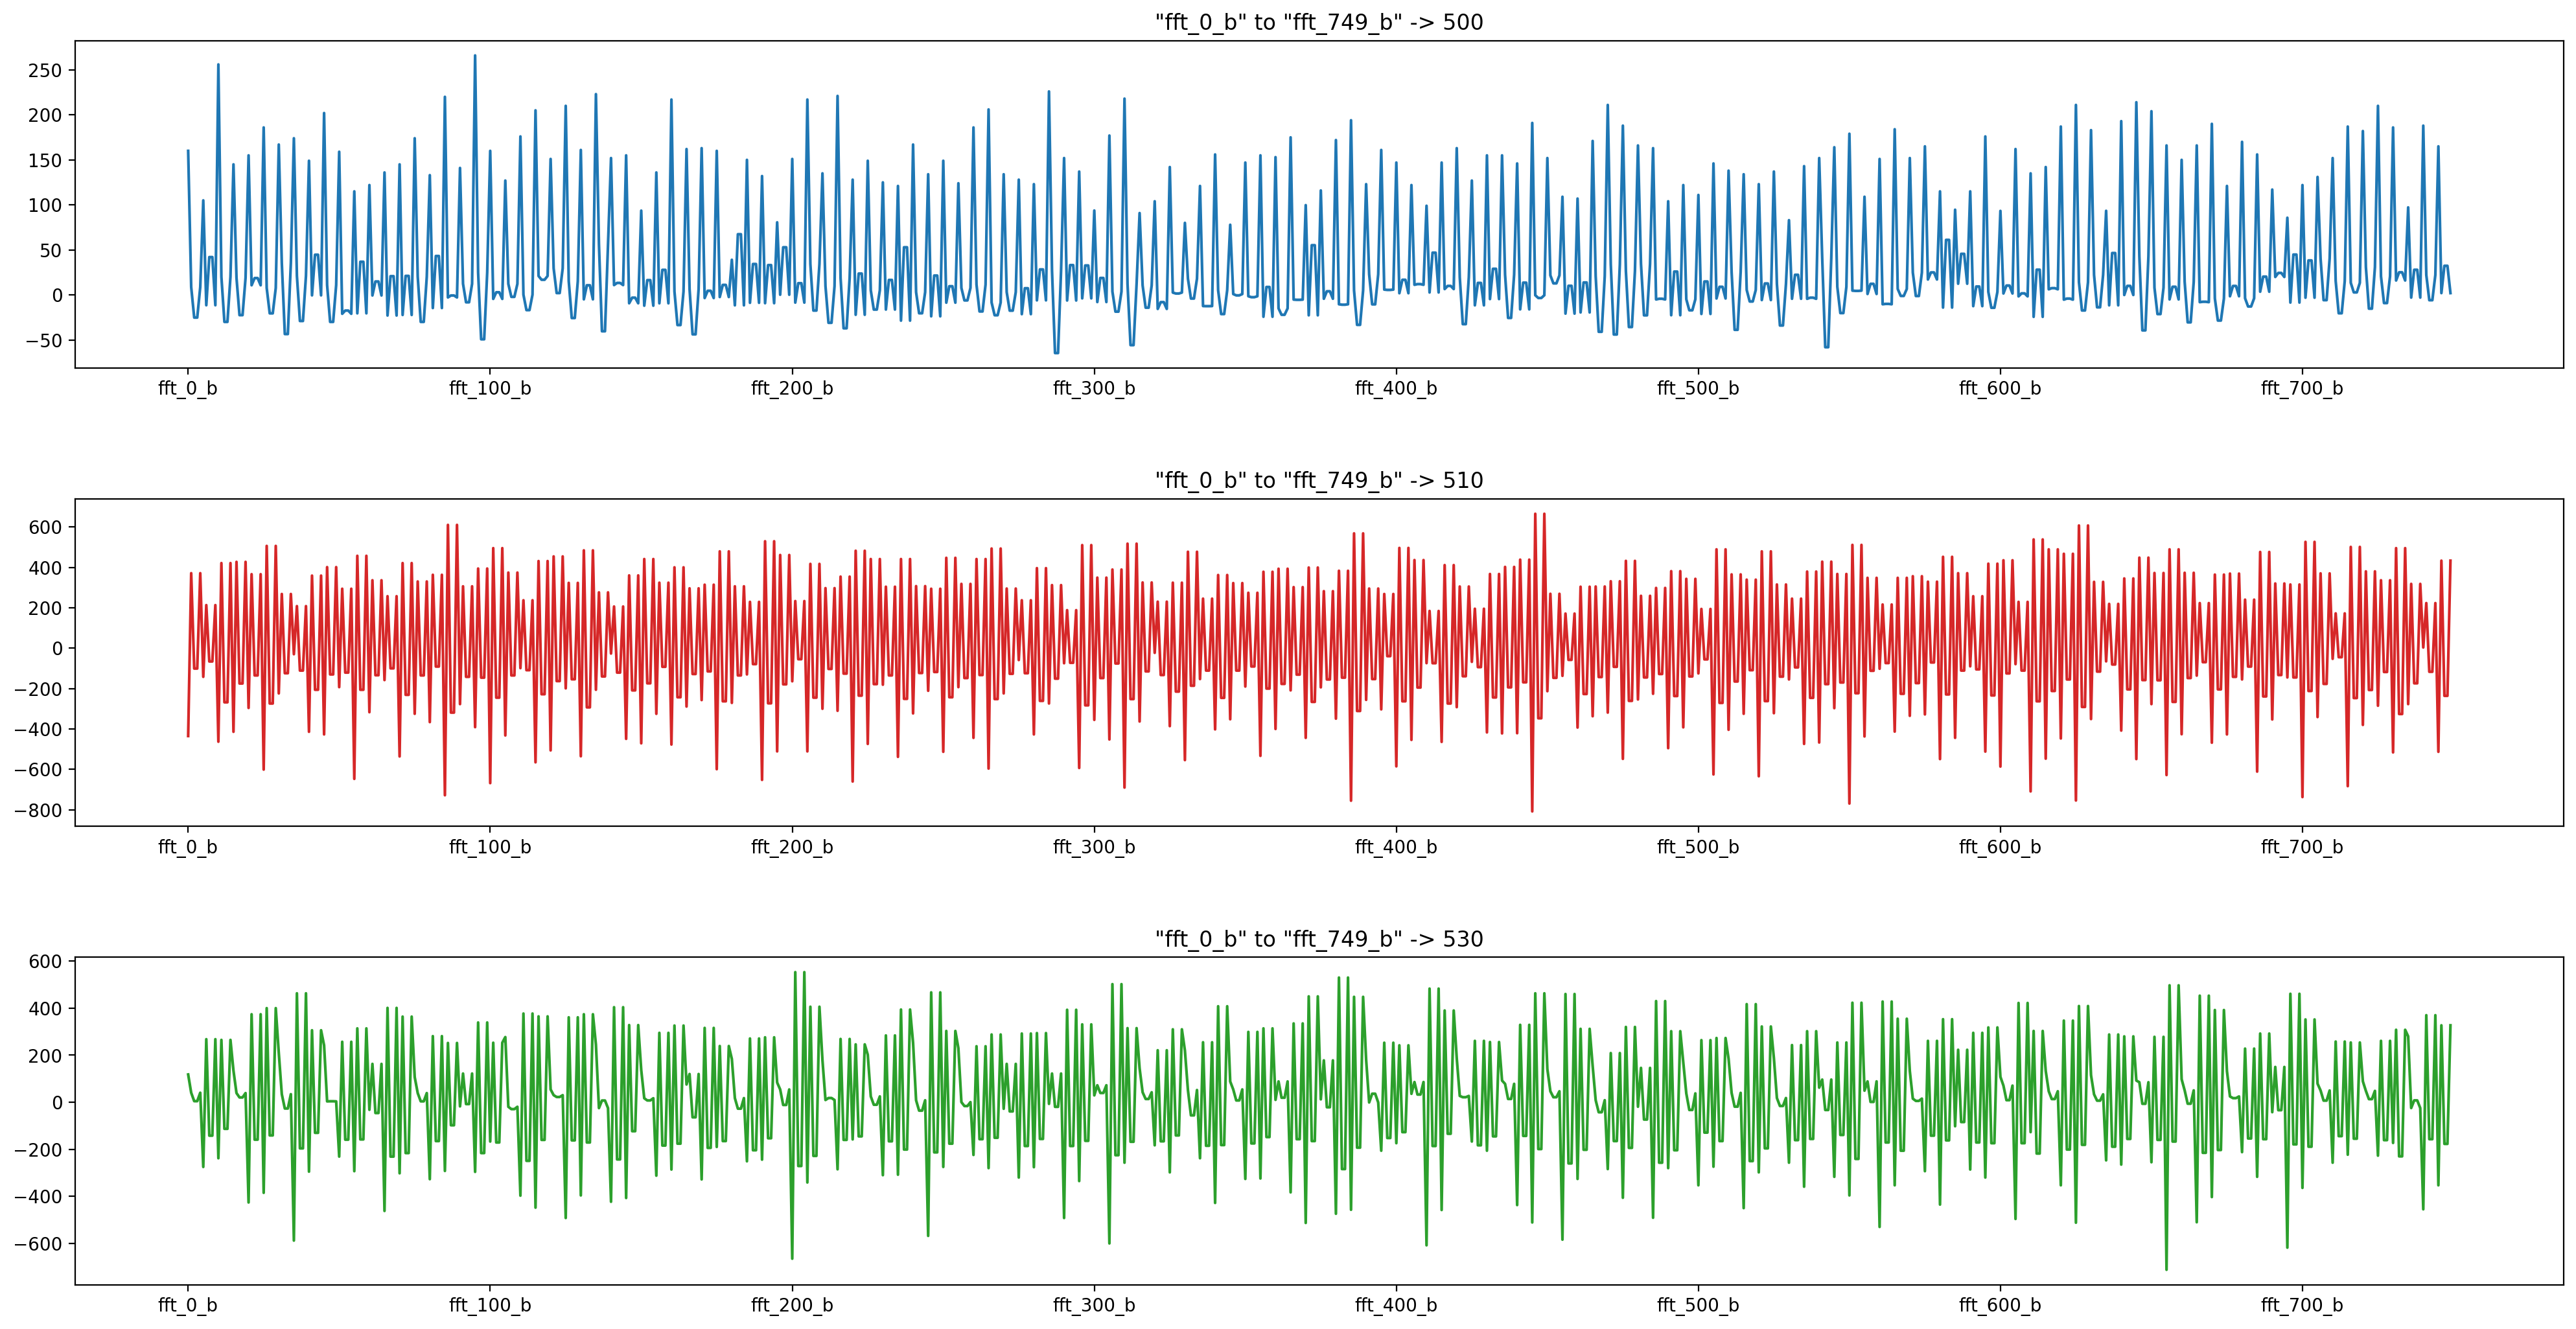

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

# patients from likely middle part
emotion_data.loc[500, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" to \"fft_749_b\" -> 500', color='tab:blue', ax=axes[0])
emotion_data.loc[510, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" to \"fft_749_b\" -> 510', color='tab:red', ax=axes[1])
emotion_data.loc[530, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" to \"fft_749_b\" -> 530', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)

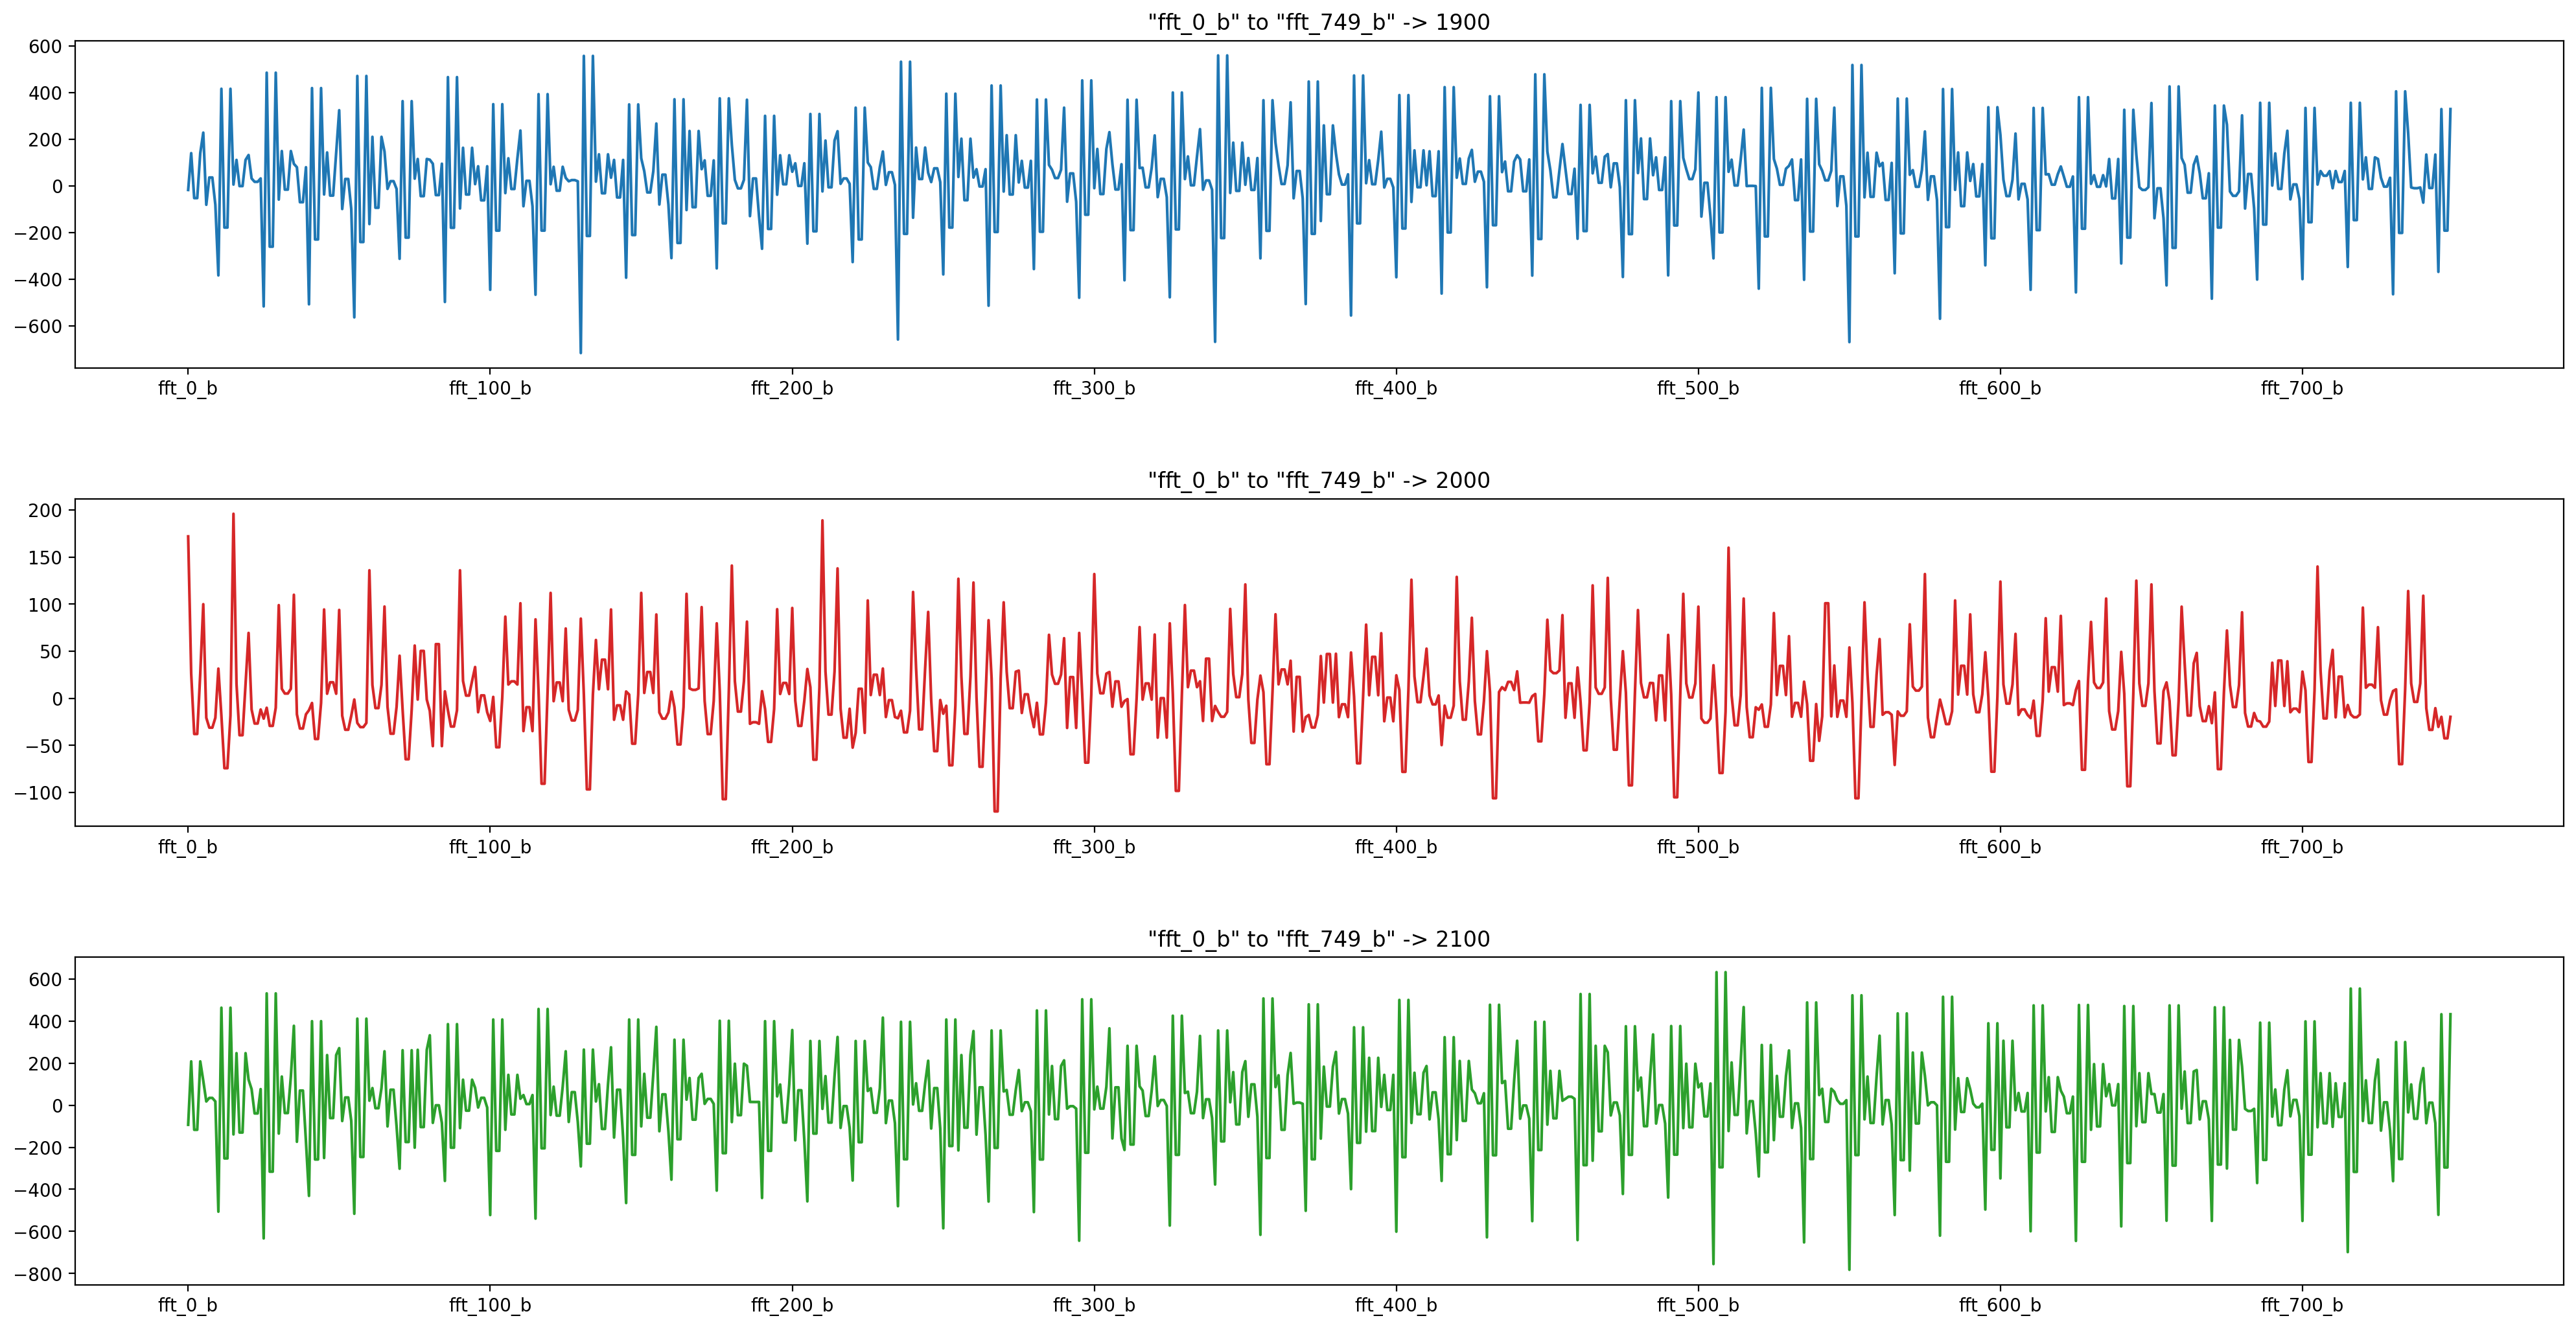

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

# patients from likely last part
emotion_data.loc[1900, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" to \"fft_749_b\" -> 1900', color='tab:blue', ax=axes[0])
emotion_data.loc[2000, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" to \"fft_749_b\" -> 2000', color='tab:red', ax=axes[1])
emotion_data.loc[2100, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" to \"fft_749_b\" -> 2100', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)

In [13]:
# One hot encoding is a technique used to represent categorical variables as numerical values in a machine learning model. 

from sklearn.preprocessing import OneHotEncoder
y=pd.get_dummies(emotion_data.label)
print(y.head(5))
X=emotion_data.drop('label',axis=1).copy()
X.head(5)

   NEGATIVE  NEUTRAL  POSITIVE
0         1        0         0
1         0        1         0
2         0        0         1
3         0        0         1
4         0        1         0


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [14]:
y=y.to_numpy()
print(type(y))
y


<class 'numpy.ndarray'>


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [15]:
# spliting data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1705, 2548)
(427, 2548)
(1705, 3)
(427, 3)


In [16]:
from sklearn import preprocessing
x=X_train
z=X_test
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
z_scaled=min_max_scaler.fit_transform(z)
dft=pd.DataFrame(z_scaled)
df=pd.DataFrame(x_scaled)
df
dft


,0,1,2,3,4,5,6,7,8,9,...,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547
0,0.593289,0.882540,0.464132,0.310551,0.967468,0.404703,0.491606,0.343841,0.371533,0.281673,...,0.346818,0.550750,0.146565,0.146565,0.550750,0.494054,0.451264,0.213535,0.213535,0.451264
1,0.620326,0.880952,0.588412,0.353930,0.961810,0.361924,0.558248,0.437121,0.331916,0.240637,...,0.548682,0.250936,0.227684,0.227684,0.250936,0.498649,0.384902,0.189901,0.189901,0.384902
2,0.643337,0.865079,0.127529,0.355191,0.958982,0.439479,0.652555,0.405303,0.374843,0.300797,...,0.308636,0.638129,0.155216,0.155216,0.638129,0.149550,0.820927,0.099575,0.099575,0.820927
3,0.780441,0.876190,0.614654,0.401009,0.954031,0.396820,0.530949,0.352992,0.351707,0.223904,...,0.552545,0.259179,0.255776,0.255776,0.259179,0.510405,0.393157,0.217084,0.217084,0.393157
4,0.491793,0.502857,0.608093,0.226566,0.932815,0.400267,0.602555,0.346750,0.354669,0.357570,...,0.557682,0.255538,0.226412,0.226412,0.255538,0.516667,0.409199,0.204719,0.204719,0.409199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.776606,0.911111,0.616186,0.392182,0.950495,0.411289,0.625912,0.355886,0.363206,0.360159,...,0.559545,0.278817,0.240254,0.240254,0.278817,0.499730,0.388272,0.230392,0.230392,0.388272
423,0.618408,0.736508,0.608706,0.290794,0.958982,0.446693,0.696715,0.346189,0.371986,0.251195,...,0.547727,0.248244,0.224682,0.224682,0.248244,0.475991,0.392992,0.206465,0.206465,0.392992
424,0.813998,0.898413,0.613979,0.411517,0.939887,0.375484,0.702555,0.345083,0.330557,0.461554,...,0.558773,0.242277,0.237644,0.237644,0.242277,0.520721,0.371138,0.213794,0.213794,0.371138
425,0.632790,0.847619,0.354384,0.340059,0.973126,0.370808,0.554234,0.332652,0.358394,0.464343,...,0.355000,0.626655,0.181170,0.181170,0.626655,0.392793,0.594803,0.185370,0.185370,0.594803


In [17]:
# USING CNN MODEL
print(X_train.shape)
print(X_test.shape)

temp_X = tf.expand_dims(df,2)
temp_Z=tf.expand_dims(dft,2)
print(temp_X.shape)
print(temp_Z.shape)
# 1st dimension refers to the input sample

# 2nd dimension refers to the length of the sample

# 3rd dimension refers to the number of channels


(1705, 2548)
(427, 2548)
(1705, 2548, 1)
(427, 2548, 1)


In [18]:
#  argmax() fucntion is used to get an array of indices of max values of a given array of single dimensions or multidimensions

ytrain_classes=[np.argmax(element) for element in y_train]
print(ytrain_classes[:5])
ytest_classes=[np.argmax(element) for element in y_test]
print(ytest_classes[:5])

[2, 2, 2, 0, 1]
[0, 2, 2, 1, 2]


In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


model = models.Sequential()
model.add(layers.Conv1D(16, 10, activation='relu',input_shape=(2548,1)))
model.add(layers.Conv1D(16, 10, activation='relu'))
# model.add(layers.Conv1D(16, 3, activation='relu'))
model.add(layers.MaxPool1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(3,activation="softmax"))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2539, 16)          176       
                                                                 
 conv1d_1 (Conv1D)           (None, 2530, 16)          2576      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1265, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20240)             0         
                                                                 
 dense (Dense)               (None, 100)               2024100   
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                        

In [20]:
history = model.fit(temp_X,y_train,epochs=15,batch_size=32)

Epoch 1/15
54/54 [==============================] - 5s 80ms/step - loss: 0.7230 - accuracy: 0.6985
Epoch 2/15
54/54 [==============================] - 5s 87ms/step - loss: 0.3679 - accuracy: 0.8569
Epoch 3/15
54/54 [==============================] - 5s 96ms/step - loss: 0.2581 - accuracy: 0.9097
Epoch 4/15
54/54 [==============================] - 4s 80ms/step - loss: 0.2566 - accuracy: 0.8997
Epoch 5/15
54/54 [==============================] - 6s 103ms/step - loss: 0.2104 - accuracy: 0.9232
Epoch 6/15
54/54 [==============================] - 4s 80ms/step - loss: 0.1586 - accuracy: 0.9402
Epoch 7/15
54/54 [==============================] - 4s 79ms/step - loss: 0.1373 - accuracy: 0.9537
Epoch 8/15
54/54 [==============================] - 6s 104ms/step - loss: 0.1267 - accuracy: 0.9560
Epoch 9/15
54/54 [==============================] - 4s 81ms/step - loss: 0.0928 - accuracy: 0.9724
Epoch 10/15
54/54 [==============================] - 4s 81ms/step - loss: 0.0936 - accuracy: 0.9672
Epoch 1

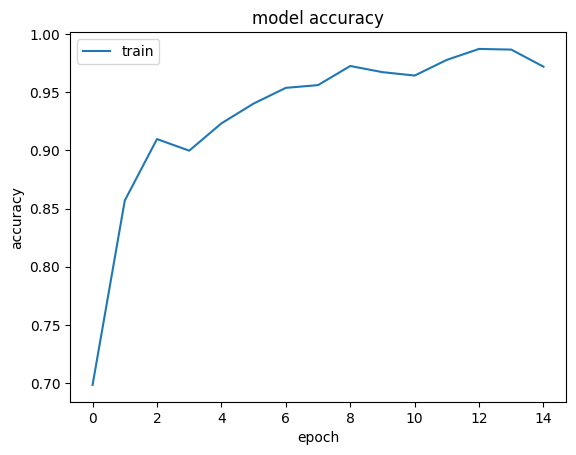

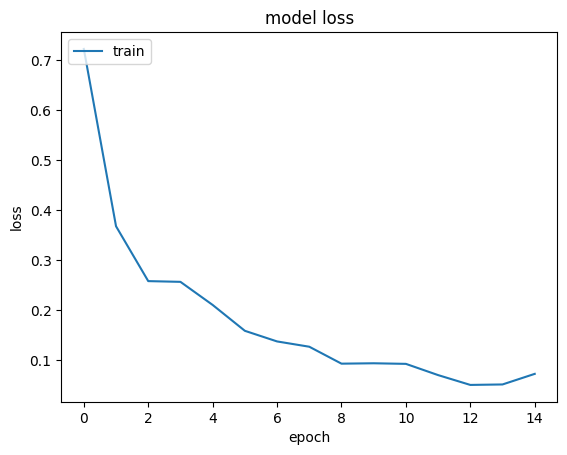

In [21]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_pred=model.predict(temp_Z)
y_pred

14/14 [==============================] - 0s 20ms/step


array([[2.8298995e-01, 6.1577209e-04, 7.1639436e-01],
       [2.0401734e-05, 5.1173959e-02, 9.4880557e-01],
       [1.7062923e-01, 4.8447500e-16, 8.2937080e-01],
       ...,
       [2.4947491e-07, 8.0177540e-01, 1.9822431e-01],
       [9.9864691e-01, 7.4496541e-11, 1.3531219e-03],
       [2.6049135e-02, 2.9647877e-04, 9.7365439e-01]], dtype=float32)

In [23]:
ypred_classes=[np.argmax(element) for element in y_pred]
ypred_classes[:20]

[2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2]

In [24]:
print("Classification Report:\n" , classification_report(ytest_classes,ypred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.84       142
           1       0.91      0.78      0.84       143
           2       0.66      0.89      0.76       142

    accuracy                           0.81       427
   macro avg       0.84      0.81      0.81       427
weighted avg       0.84      0.81      0.81       427



In [25]:
print(cohen_kappa_score(ytest_classes, ypred_classes))

0.7119896028690818


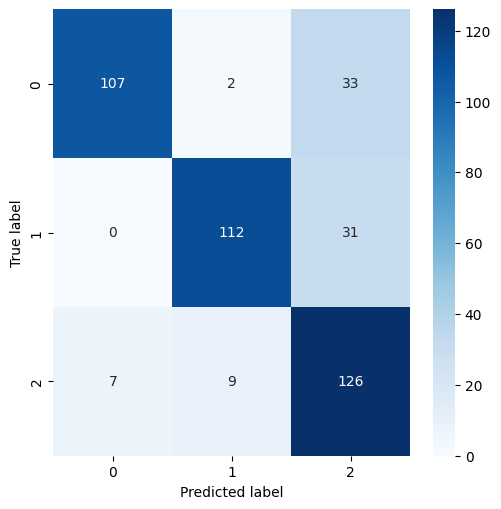

In [26]:
import seaborn as sns
figure = plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(ytest_classes, ypred_classes), annot=True,cmap=plt.cm.Blues,fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()